First we import the data

In [22]:
import pandas as pd


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:

df = pd.read_csv('Housing.csv')
df

In [23]:
y = df['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [24]:
x = df.drop('price', axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

# Ensure train and test sets have the same columns
x_train, x_test = x_train.align(x_test, join='left', axis=1)
x_test.fillna(0, inplace=True)
lr.fit(x_train, y_train)


LinearRegression()

In [27]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [29]:
print('LR MSE TRAIN: ', lr_train_mse)
print('LR R2 TRAIN: ', lr_train_r2)
print('LR MSE TEST: ', lr_test_mse)
print('LR R2 TEST: ', lr_test_r2)

LR MSE TRAIN:  1119480643641.93
LR R2 TRAIN:  0.67817893928693
LR MSE TEST:  1127125806714.587
LR R2 TEST:  0.6806539407870678


Text(0.5, 0, 'Experimental Price')

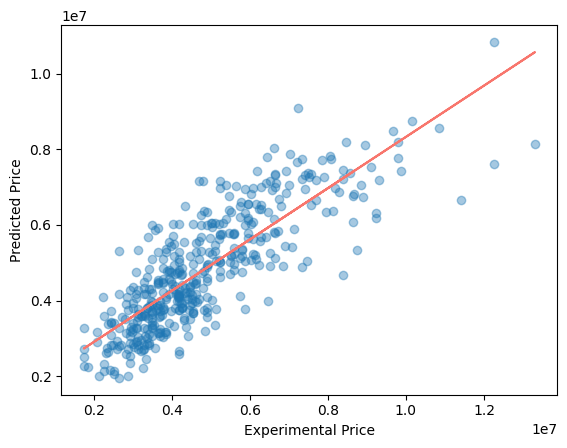

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.4)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predicted Price')
plt.xlabel('Experimental Price')

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
residuals_lr = y_test - y_lr_test_pred
mean_absolute_residual = residuals_lr.abs().mean()
print("Mean Absolute Residual:", mean_absolute_residual)

residuals_lr


Mean Absolute Residual: 785292.2977183007


265    429395.383395
54     611975.007570
171   -358520.696217
244   -680286.404985
268   -426901.202207
           ...      
451   -664713.706299
320   -849914.405487
424    234689.959432
338   -275163.089327
373   -614684.398816
Name: price, Length: 109, dtype: float64

In [50]:
import joblib

x_train = pd.get_dummies(x_train, drop_first=True)
joblib.dump(x_train.columns, 'feature_columns.pkl')

# After training the model
joblib.dump(lr, 'house_price_model_lr.pkl')
joblib.dump(rf, 'house_price_model_rf.pkl')


['house_price_model_rf.pkl']